In [1]:
#Este documento sirve de ejemplo de uso de las funciones ToolBox del grupo california

In [2]:
# Importar toolbox
import ToolBox_Californiano as tb
import pandas as pd
import numpy as np

In [3]:
from importlib import reload
reload(tb)
dir(tb)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'clasifica_variables',
 'describe_df',
 'f_oneway',
 'get_features_cat_regression',
 'get_features_num_regression',
 'np',
 'pd',
 'pearsonr',
 'plot_features_cat_regression',
 'plot_features_num_regression',
 'plt',
 'sns']

In [4]:
#Importar dataframe
df = pd.read_csv('../data/bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
tb.describe_df(df)

COL_N,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
DATA_TYPE,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,77,12,3,4,2,7168,2,2,3,31,12,1573,48,559,41,4,2
CARDIN (%),0.0,0.0,0.0,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.01,0.0,0.0,0.0


In [6]:
tb.clasifica_variables(df,0.05,0.05)

,nombre_variable,tipo_sugerido
0,age,Numérica Discreta
1,job,Categórica
2,marital,Categórica
3,education,Categórica
4,default,Binaria
5,balance,Numérica Continua
6,housing,Binaria
7,loan,Binaria
8,contact,Categórica
9,day,Numérica Discreta


In [7]:
tb.get_features_num_regression(df,'pdays',0.05,0.05)

La correlacion entre las columnas numericas y el target debe superar: 0.05
---------------------------------------------------------------------------
<age> corr con target: -0.0237580141117363
<balance> corr con target: 0.0034353218681070826
<day> corr con target: -0.09304407377294048
<duration> corr con target: -0.0015647704813434265
<campaign> corr con target: -0.08862766791568381
<previous> corr con target: 0.45481963548050086

¿Es la correlacion estadisticamente significativa?
---------------------------------------------------------------------------
<day>: 1.7648822076577629e-87 Si
<campaign>: 1.621196522263136e-79 Si
<previous>: 0.0 Si


['day', 'campaign', 'previous']

Columna: day, p-value: 1.7648822076577629e-87
Columna: campaign, p-value: 1.621196522263136e-79
Columna: pdays, p-value: [0. 0.]
Columna: previous, p-value: 0.0


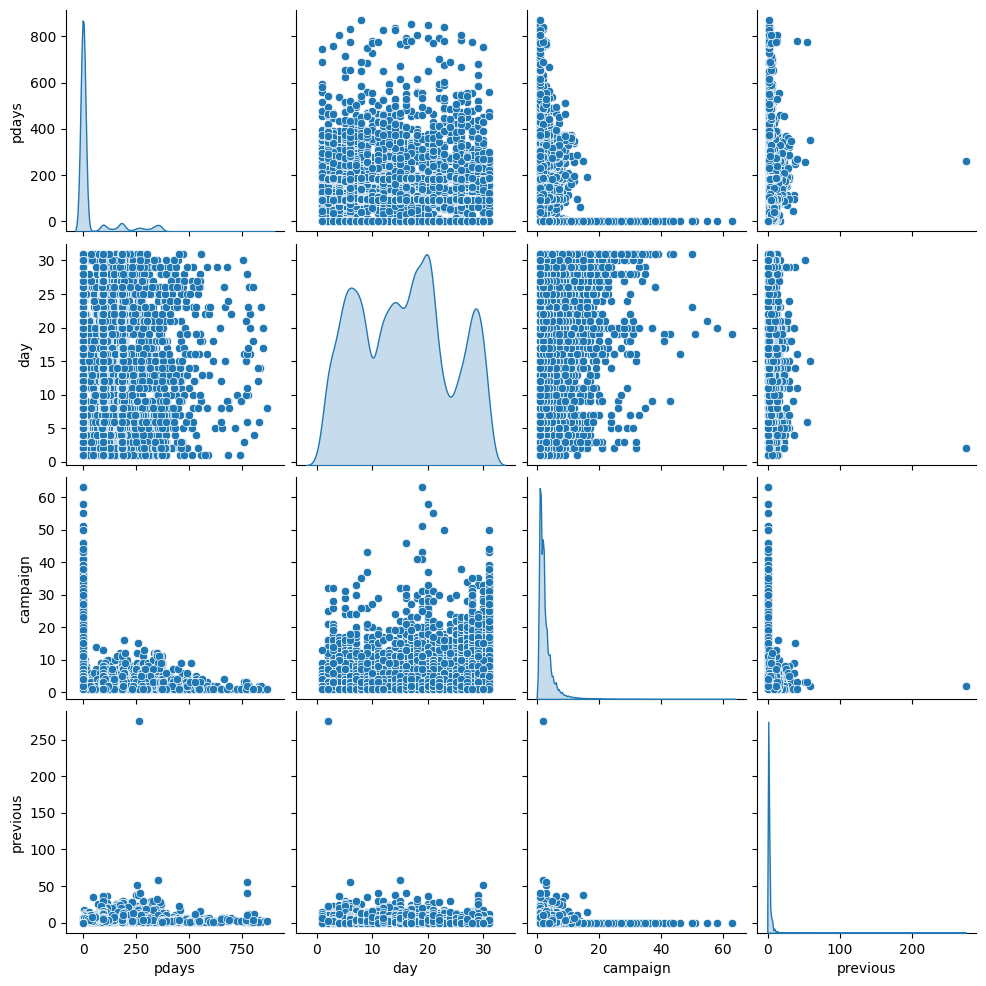

['day', 'campaign', 'previous']

In [8]:
columns = df.select_dtypes(include=np.number).columns.tolist()

tb.plot_features_num_regression(df,'pdays',columns,   0.05,0.05)

In [9]:
tb.get_features_cat_regression(df,'pdays',0.05)

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

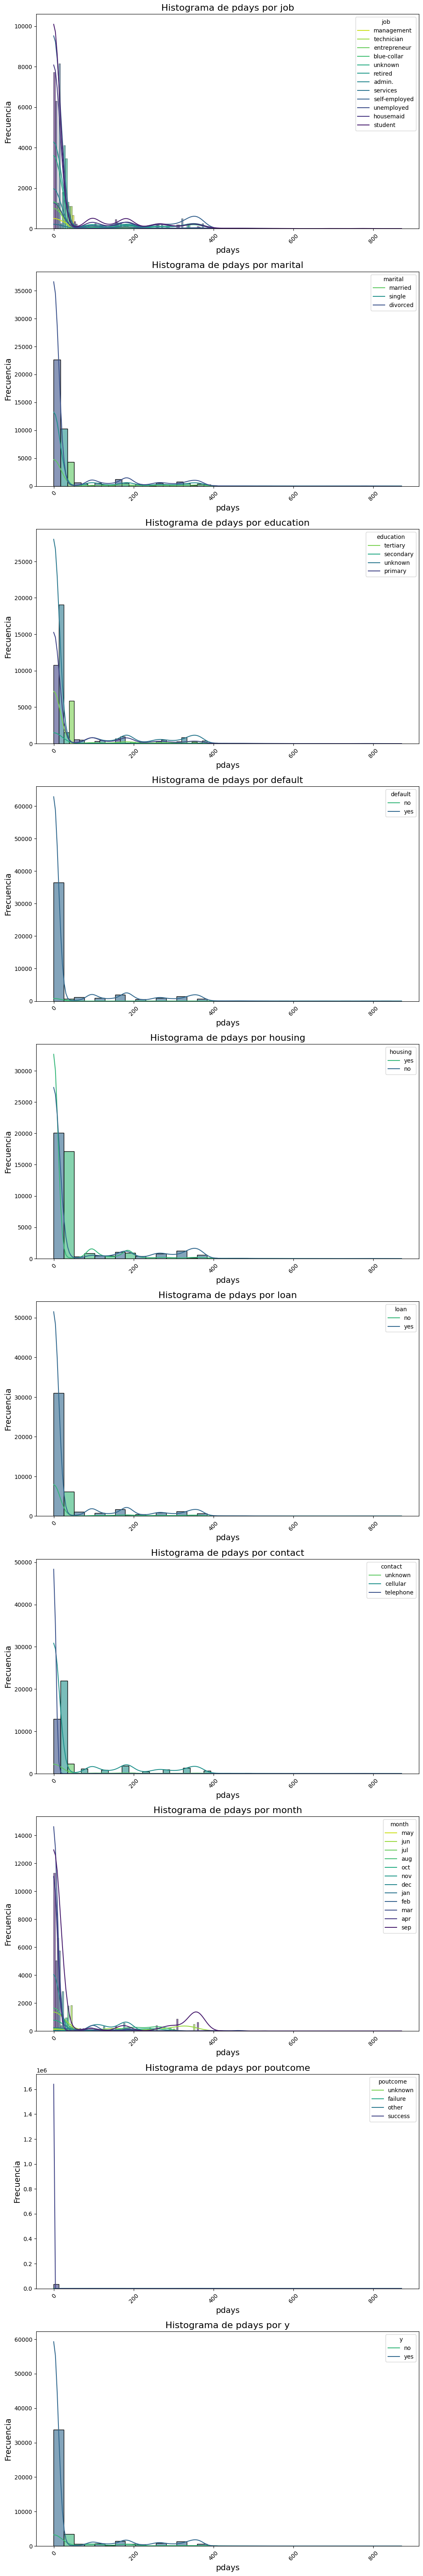

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [10]:
columns = df.select_dtypes(object).columns.tolist()

tb.plot_features_cat_regression(df,'pdays',columns,0.05)